# Introduction
Here we will explore and clean the data to ensure it's good for modeling and applying different machine learning techniques.

## Import libraries and load dataset 

In [1267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [1269]:
df  = pd.read_csv(r"C:\Users\kajoo\Desktop\Data Mining\Infrastructure and Transport Sector Competition.csv",encoding='utf-8',low_memory=False)

In [1270]:
pd.set_option('display.float_format', '{:,.0f}'.format)


## EDA (Exploratory Data Analysis)
In this section we will follow this plan:
1. See the agency with the most competitions.
2. Discover the number of dupilacted rows and columns with only one value.
3. Discover missing values.
4. Change column names so that they're easier to deal with.
5. Discover the agencies with the highest requested budgets.
6. Discover outliar in value column.

In [1274]:
df.head()

,السنة,اسم المنافسة,الرقم,الوصف,القطاع,الجهة,تاريخ البدء,تاريخ الانتهاء,حالة المنافسة,القيمة بالريال
0,"2,024",اتفاقية اطارية لتقديم خدمات دعم قانوني لإدارة ...,"240,539,007,138",-,قطاع التجهيزات الأساسية والنقل,الهيئة العامة للطيران المدني,09/05/24,07/07/24,تم اعتماد الترسية,"998,775"
1,"2,024",دورات تدريبية هندسية متنوعة للمرحلة الاولى - IRF,"240,239,009,547",-,قطاع التجهيزات الأساسية والنقل,وزارة النقل والخدمات اللوجستية - الديوان العام,15/02/24,05/03/24,تم اعتماد الترسية,"100,000"
2,"2,024",تنفيذ برنامج في مجال الرصف الاسفلتي,"240,239,017,209",-,قطاع التجهيزات الأساسية والنقل,وزارة النقل والخدمات اللوجستية - الديوان العام,27/02/24,31/03/24,تم اعتماد الترسية,"100,000"
3,"2,024",لقاء تنفيذ برنامج في مجال الشراكة بين القطاع ا...,"240,339,014,411",-,قطاع التجهيزات الأساسية والنقل,وزارة النقل والخدمات اللوجستية - الديوان العام,21/03/24,17/04/24,تم اعتماد الترسية,"100,000"
4,"2,024",لقاء تنفيذ برنامج هندسي في مجال الانفاق,"240,439,009,993",-,قطاع التجهيزات الأساسية والنقل,وزارة النقل والخدمات اللوجستية - الديوان العام,22/04/24,07/05/24,تم اعتماد الترسية,"100,000"


In [1275]:
df.shape  #the actual number of rows is 1311 NOT 1024319

(1024319, 10)

In [1276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024319 entries, 0 to 1024318
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   السنة            1311 non-null   float64
 1   اسم المنافسة     1311 non-null   object 
 2   الرقم            1311 non-null   float64
 3   الوصف            1311 non-null   object 
 4   القطاع           1311 non-null   object 
 5   الجهة            1311 non-null   object 
 6   تاريخ البدء      1311 non-null   object 
 7   تاريخ الانتهاء   1311 non-null   object 
 8   حالة المنافسة    1311 non-null   object 
 9   القيمة بالريال   1311 non-null   float64
dtypes: float64(3), object(7)
memory usage: 78.1+ MB


In [1277]:
df.describe()

,السنة,الرقم,القيمة بالريال
count,"1,311","1,311","1,311"
mean,"2,024","240,636,340,383","3,406,378"
std,0,"305,797,453","17,602,283"
min,"2,024","240,139,000,283",1
25%,"2,024","240,339,016,940","20,004"
50%,"2,024","240,639,005,180","97,750"
75%,"2,024","240,839,018,888","999,938"
max,"2,024","241,239,012,723","378,000,040"


## Renaming columns from Arabic to English
- renaming makes the cleaning process much easier

In [1279]:
df.columns # the column names being in arabic was difficult to deal with 

Index(['السنة', 'اسم المنافسة', 'الرقم', 'الوصف', 'القطاع', 'الجهة',
       'تاريخ البدء', 'تاريخ الانتهاء', 'حالة المنافسة', 'القيمة بالريال '],
      dtype='object')

In [1280]:
df.columns = [
    "Year",
    "Competition_Name",
    "ID",
    "Description",
    "Sector",
    "Entity",
    "Start_Date",
    "End_Date",
    "Status",
    "Value_SAR"
]
# Changed the column names so that they would be easier to deal with

## Analyzing entities 
- Seeing which entity has the most competitions
- Discovering the entity with the most expensive values

In [1282]:
most_comps = df.groupby("Entity")["Competition_Name"].count().sort_values(ascending = False)
most_comps.head(10)

Entity
وزارة النقل والخدمات اللوجستية - الديوان العام    532
الهيئة العامة للطيران المدني                      156
مؤسسة البريد السعودي                              108
صندوق التنمية العقارية                             82
الهيئة العامة للعقار                               67
الهيئة العامة للنقل                                65
وكالة الفضاء السعودية                              64
الهيئة السعودية للمواصفات والمقاييس والجودة        62
الهيئة العامة للطرق                                57
برنامج الخدمات الصحيه بالهيئة الملكية بالجبيل      49
Name: Competition_Name, dtype: int64

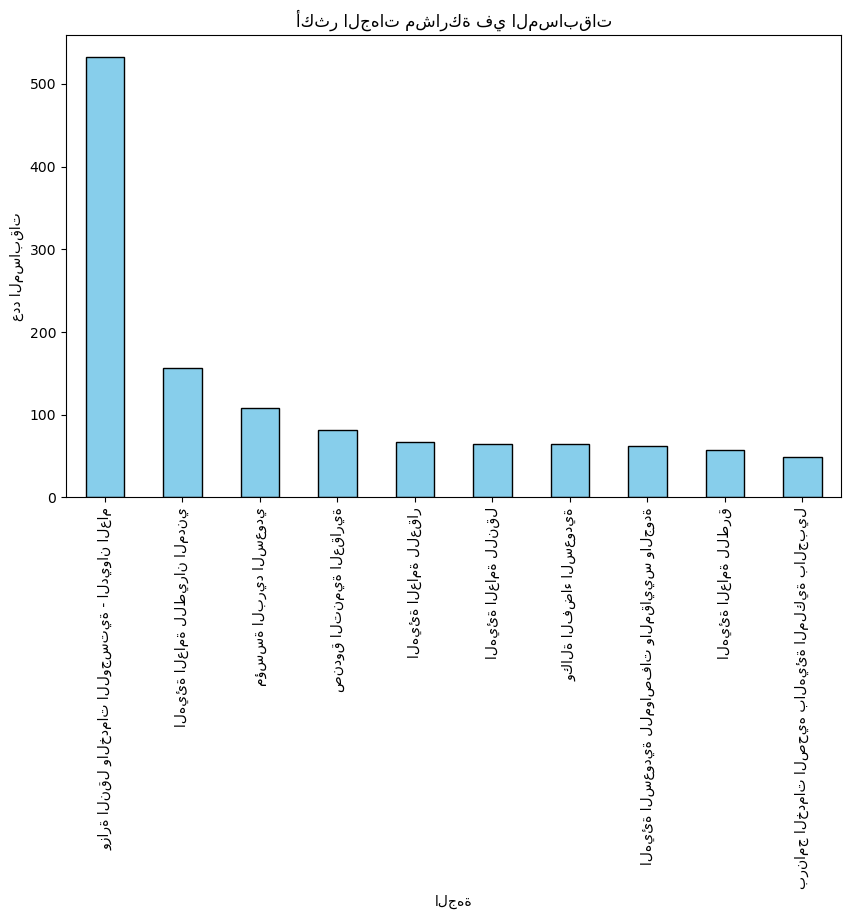

In [1283]:
most_comps.head(10).plot.bar(
    figsize=(10,6),
    title="أكثر الجهات مشاركة في المسابقات",
    xlabel="الجهة",
    ylabel="عدد المسابقات",
    color="skyblue",
    edgecolor="black"
)
plt.show()


In [1284]:
agencies = df.groupby("Entity")["Value_SAR"].sum().sort_values(ascending=False)
agencies.head(10)


Entity
وزارة النقل والخدمات اللوجستية - الديوان العام     1,415,087,232
مؤسسة البريد السعودي                                 902,075,145
الهيئة العامة للنقل                                  732,286,750
وزارة الاتصالات وتقنية المعلومات - الديوان العام     267,577,785
الهيئة العامة للطيران المدني                         254,919,137
صندوق التنمية العقارية                               234,571,735
الهيئة العامة للعقار                                 211,549,739
الهيئة العامة للطرق                                  193,325,383
الهيئة السعودية للمواصفات والمقاييس والجودة          140,546,936
وكالة الفضاء السعودية                                 56,095,363
Name: Value_SAR, dtype: float64

## Detecting missing or duplicate values 
- No duplicate values, beause the data is in arabic theres most likely an encoding issue that makes python think thaat there is duplicate data

In [1286]:
duplicates = df.duplicated().count()
print("Number of duplicated rows:",duplicates) #This amount is likely due to the fact the there are columns with only on value plus the values being in arabic

Number of duplicated rows: 1024319


In [1287]:
single_value_cols = [col for col in df.columns if df[col].nunique() ==1]
print("Single value columns are:",single_value_cols)

Single value columns are: ['Year', 'Sector', 'Status']


In [1288]:
missing = df[df.isna().any(axis=1)]
missing

,Year,Competition_Name,ID,Description,Sector,Entity,Start_Date,End_Date,Status,Value_SAR
1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1024314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1024315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1024316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1024317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1289]:
rows_before_duplicates = df.drop_duplicates()
print("Rows before droping duplicates",df.count())
print("Rows after droping duplicates",rows_before_duplicates.count())

#Both are 1311 meaning there aren't any duplicate rows, the previous value in the code above was most likely just enconing issues since the data is in arabic and there isnt any missing values 

Rows before droping duplicates Year                1311
Competition_Name    1311
ID                  1311
Description         1311
Sector              1311
Entity              1311
Start_Date          1311
End_Date            1311
Status              1311
Value_SAR           1311
dtype: int64
Rows after droping duplicates Year                1311
Competition_Name    1311
ID                  1311
Description         1311
Sector              1311
Entity              1311
Start_Date          1311
End_Date            1311
Status              1311
Value_SAR           1311
dtype: int64


## Data Cleaning
1. Remove columns with only one value and irralavent columns 
2. Convert columns to the correct types
3. Feature engineering: Add a timeline column
4. Remove outliars 

## Droping useless columns
- columns that have no predictive power ot have one or two values 

In [1292]:
df.columns 

Index(['Year', 'Competition_Name', 'ID', 'Description', 'Sector', 'Entity',
       'Start_Date', 'End_Date', 'Status', 'Value_SAR'],
      dtype='object')

In [1293]:
# Columns to remove are Year, ID, Description, Status and Sector 
df1 = df.drop(columns=["Year","ID","Description","Sector","Status"])
df1.columns

Index(['Competition_Name', 'Entity', 'Start_Date', 'End_Date', 'Value_SAR'], dtype='object')

## Removing missing values and coverting columns to the correct data type
- The start and end date columns were not the correct data type

In [1295]:
df2 = df1.copy()

In [1296]:
df2.dropna(inplace=True)

In [1297]:
df2["Start_Date"] = pd.to_datetime(df2["Start_Date"], errors="coerce")
df2["End_Date"] = pd.to_datetime(df2["End_Date"], errors="coerce")

C:\Users\kajoo\AppData\Local\Temp\ipykernel_14708\3149748795.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2["Start_Date"] = pd.to_datetime(df2["Start_Date"], errors="coerce")
C:\Users\kajoo\AppData\Local\Temp\ipykernel_14708\3149748795.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2["End_Date"] = pd.to_datetime(df2["End_Date"], errors="coerce")


## Creating a new "duration" column
- A that indicates the number of days a competition took to get approved 

In [1299]:
mask = df2["End_Date"] < df2["Start_Date"]
df2.loc[mask, ["Start_Date", "End_Date"]] = df2.loc[mask, ["End_Date", "Start_Date"]].values


In [1300]:
df2["duration"] = (df2["End_Date"] - df2["Start_Date"]).dt.days

In [1301]:
df2["duration"].max()

513

## Cleaning competition names
- So that when I extract features form the names I don't have any issues 

In [1303]:
df2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

,Competition_Name,Entity,Start_Date,End_Date,Value_SAR,duration
0,اتفاقية اطارية لتقديم خدمات دعم قانوني لإدارة ...,الهيئة العامة للطيران المدني,2024-07-07,2024-09-05,"998,775",60
1,دورات تدريبية هندسية متنوعة للمرحلة الاولى - IRF,وزارة النقل والخدمات اللوجستية - الديوان العام,2024-02-15,2024-05-03,"100,000",78
2,تنفيذ برنامج في مجال الرصف الاسفلتي,وزارة النقل والخدمات اللوجستية - الديوان العام,2024-02-27,2024-03-31,"100,000",33
3,لقاء تنفيذ برنامج في مجال الشراكة بين القطاع ا...,وزارة النقل والخدمات اللوجستية - الديوان العام,2024-03-21,2024-04-17,"100,000",27
4,لقاء تنفيذ برنامج هندسي في مجال الانفاق,وزارة النقل والخدمات اللوجستية - الديوان العام,2024-04-22,2024-07-05,"100,000",74
...,...,...,...,...,...,...
1306,لقاء مشاركة فرع وزارة النقل والخدمات اللوجستية...,وزارة النقل والخدمات اللوجستية - الديوان العام,2024-02-26,2024-07-02,"9,154",127
1307,لقاء مشاركة فرع وزارة النقل والخدمات اللوجستية...,وزارة النقل والخدمات اللوجستية - الديوان العام,2024-09-29,2024-10-09,"29,026",10
1308,طباعة استكرات تصريح دخول المركبات للموظفين للم...,وزارة النقل والخدمات اللوجستية - الديوان العام,2024-02-18,2024-05-14,"8,050",86
1309,مؤتمرات واجتماعات الهيئة خلال شهر مايو 2024م ف...,الهيئة العامة للطيران المدني,2024-04-14,2024-05-27,"4,044,613",43


## Creating "Categories" for each competition 
- This helps to add more predictive power to the dataset and the cetegories are based on the competition names

In [1305]:
def extract_category(name):
    # Normalize input
    name = str(name)

    # Legal
    if any(w in name for w in ["قانون", "قضية", "قانوني", "محاماة", "تشريع"]):
        return "Legal"

    # Training / Education
    if any(w in name for w in ["تدريب", "برامج تدريبية", "دورة", "دورات", "تأهيل", "تعليم", "مهني"]):
        return "Training"

    # Engineering
    if any(w in name for w in ["هندسي", "هندسة", "جسور", "طرق", "انفاق", "مخططات", "تصميم"]):
        return "Engineering"

    # Consulting / Studies
    if any(w in name for w in ["استشارة", "استشارات", "دراسة", "تحليل", "تقييم", "استقصاء"]):
        return "Consulting"

    # Infrastructure & Construction
    if any(w in name for w in ["اسفلت", "رصف", "بنية", "إنشاء", "ترميم", "مبنى", "غرف عازلة", "توسعة"]):
        return "Infrastructure"

    # IT / Systems / Technology
    if any(w in name for w in ["نظام", "أنظمة", "تقنية", "منصة", "تطبيق", "خادم", "شبكة", "5G", "سيبراني", "برمج"]):
        return "IT/Technology"

    # Communications / Telecommunication
    if any(w in name for w in ["اتصال", "اتصالات", "لاسلكي", "راوتر", "مكالمات", "رقم موحد"]):
        return "Communication"

    # Printing services
    if any(w in name for w in ["طباعة", "طابعات", "مطبوعات"]):
        return "Printing"

    # Events / Workshops
    if any(w in name for w in ["فعالية", "ملتقى", "ورشة", "اجتماع", "قاعة", "مؤتمر", "ندوة"]):
        return "Events"

    # Marketing / Awareness
    if any(w in name for w in ["تسويق", "توعية", "إعلان", "حملة إعلامية"]):
        return "Marketing"

    # Research / Scientific
    if any(w in name for w in ["بحث", "قياس", "جسيمات الغبار", "دراسة علمية", "تجربة", "تحري"]):
        return "Research"

    # Operations / General Services
    if any(w in name for w in ["تشغيل", "إدارة", "تشغيل وصيانة"]):
        return "Operations"

    # Maintenance (IT or building)
    if any(w in name for w in ["صيانة", "إصلاح", "تصليح", "صيانة النظام"]):
        return "Maintenance"

    # Supply / Equipment
    if any(w in name for w in ["توريد", "تزويد", "تأمين", "مواد", "مستلزمات", "أجهزة"]):
        return "Supply"

    # Logistics
    if any(w in name for w in ["لوجستي", "لوجستية", "نقل", "شحن", "تنقلات", "مستودعات"]):
        return "Logistics"

    # Vehicles / Transport
    if any(w in name for w in ["سيارات", "كفرات", "قطع غيار", "استئجار سيارات"]):
        return "Vehicles"

    # Cleaning / Janitorial
    if any(w in name for w in ["نظافة", "تنظيف"]):
        return "Cleaning"

    # Furniture
    if any(w in name for w in ["أثاث", "تأثيث", "كرسي", "مكتب"]):
        return "Furniture"

    # Fire safety / Firefighting systems
    if any(w in name for w in ["مكافحة الحريق", "طفاية", "سلامة الحريق"]):
        return "Fire Safety"

    # Safety & Quality
    if any(w in name for w in ["سلامة", "جودة", "اعتماد", "شهادة"]):
        return "Safety/Quality"

    # Environment
    if any(w in name for w in ["بيئة", "نفايات", "تشجير", "استدامة"]):
        return "Environment"

    # Finance
    if any(w in name for w in ["مالي", "محاسبي", "محاسبة", "خزينة"]):
        return "Finance"

    # Audit
    if any(w in name for w in ["مراجعة", "تدقيق", "حوكمة"]):
        return "Audit"

    # Travel & Hospitality
    if any(w in name for w in ["سكن", "فندق", "حجوزات", "تنقلات", "رحلة"]):
        return "Travel"

    # Media / Photography
    if any(w in name for w in ["كاميرا", "تصوير", "فيديو"]):
        return "Media"

    # Real Estate
    if any(w in name for w in ["عقار", "مشروعات عقارية", "لوحات خارجية"]):
        return "Real Estate"

    # Customer Experience
    if any(w in name for w in ["تجربة العميل", "رضا العملاء", "المتسوق الخفي"]):
        return "Customer Experience"

    # Programs & Initiatives
    if any(w in name for w in ["برنامج", "مبادرة", "مشروع"]):
        return "Program"

    return "Other"
#Function creates categories for each competition 

In [1306]:
df2["category"] = df2["Competition_Name"].apply(extract_category)


## Creating new numeric features 
- Features are aggregations based on entities, categories and date
- After creating the numeric freatures I encoded both Entity and Category

In [1308]:
entity_stats = df2.groupby('Entity')['Value_SAR'].agg(
    ['mean', 'median', 'std', 'count']
)
entity_stats.columns = ['entity_mean_value','entity_median_value','entity_std','entity_freq']

df2 = df2.merge(entity_stats, left_on='Entity', right_index=True, how='left')
#added some numeric features THEN encoded the enitiy column

In [1309]:
df3 = pd.get_dummies(df2, columns=['Entity'],dtype=int)

In [1310]:
#df3["start_year"] = df3["Start_Date"].dt.year
df3["start_day"] = df3["Start_Date"].dt.day
df3["is_year_end"] = (df3["Start_Date"].dt.month >= 10).astype(int)
df3["is_weekend"] = df3["Start_Date"].dt.dayofweek.isin([4,5]).astype(int)


In [1311]:
cat_stats = df3.groupby('category')['Value_SAR'].agg(
    ['mean','median','std','count']
)
cat_stats.columns = ['cat_mean_value','cat_median_value','cat_std','cat_freq']

df3 = df3.merge(cat_stats, left_on='category', right_index=True, how='left')


In [1312]:
df4 = pd.get_dummies(df3, columns=['category'],dtype=int)

## Transformed the variable
- Used log transformation to decrease the varinace in the target

In [1314]:
df4["Value_SAR_log"] = np.log1p(df4["Value_SAR"])

<Axes: >

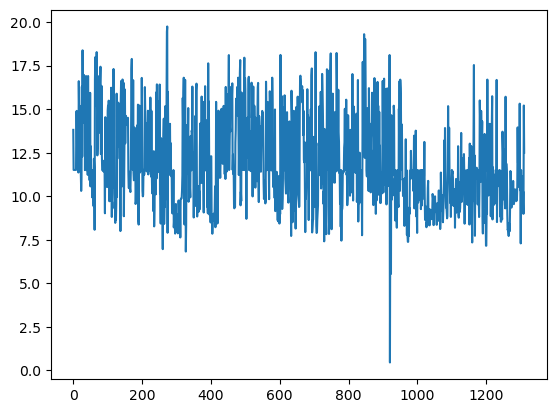

In [1315]:
df4["Value_SAR_log"].plot()

## Added text-based features
- They are based on the competition names


In [1317]:
df4["name_length"] = df4["Competition_Name"].str.len()
df4["word_count"] = df4["Competition_Name"].str.split().str.len()


In [1318]:
df4["numbers_in_text"] = df4["Competition_Name"].str.findall(r'\d+').apply(lambda x: sum(map(int, x)) if len(x)>0 else 0)


## Dicovring correlation with the target

In [1320]:
numeric_cols = df4.select_dtypes(include=np.number).columns
corr_with_target = df4[numeric_cols].corr()["Value_SAR_log"].sort_values(ascending=False)
corr_list = list(zip(corr_with_target.index, corr_with_target.values))


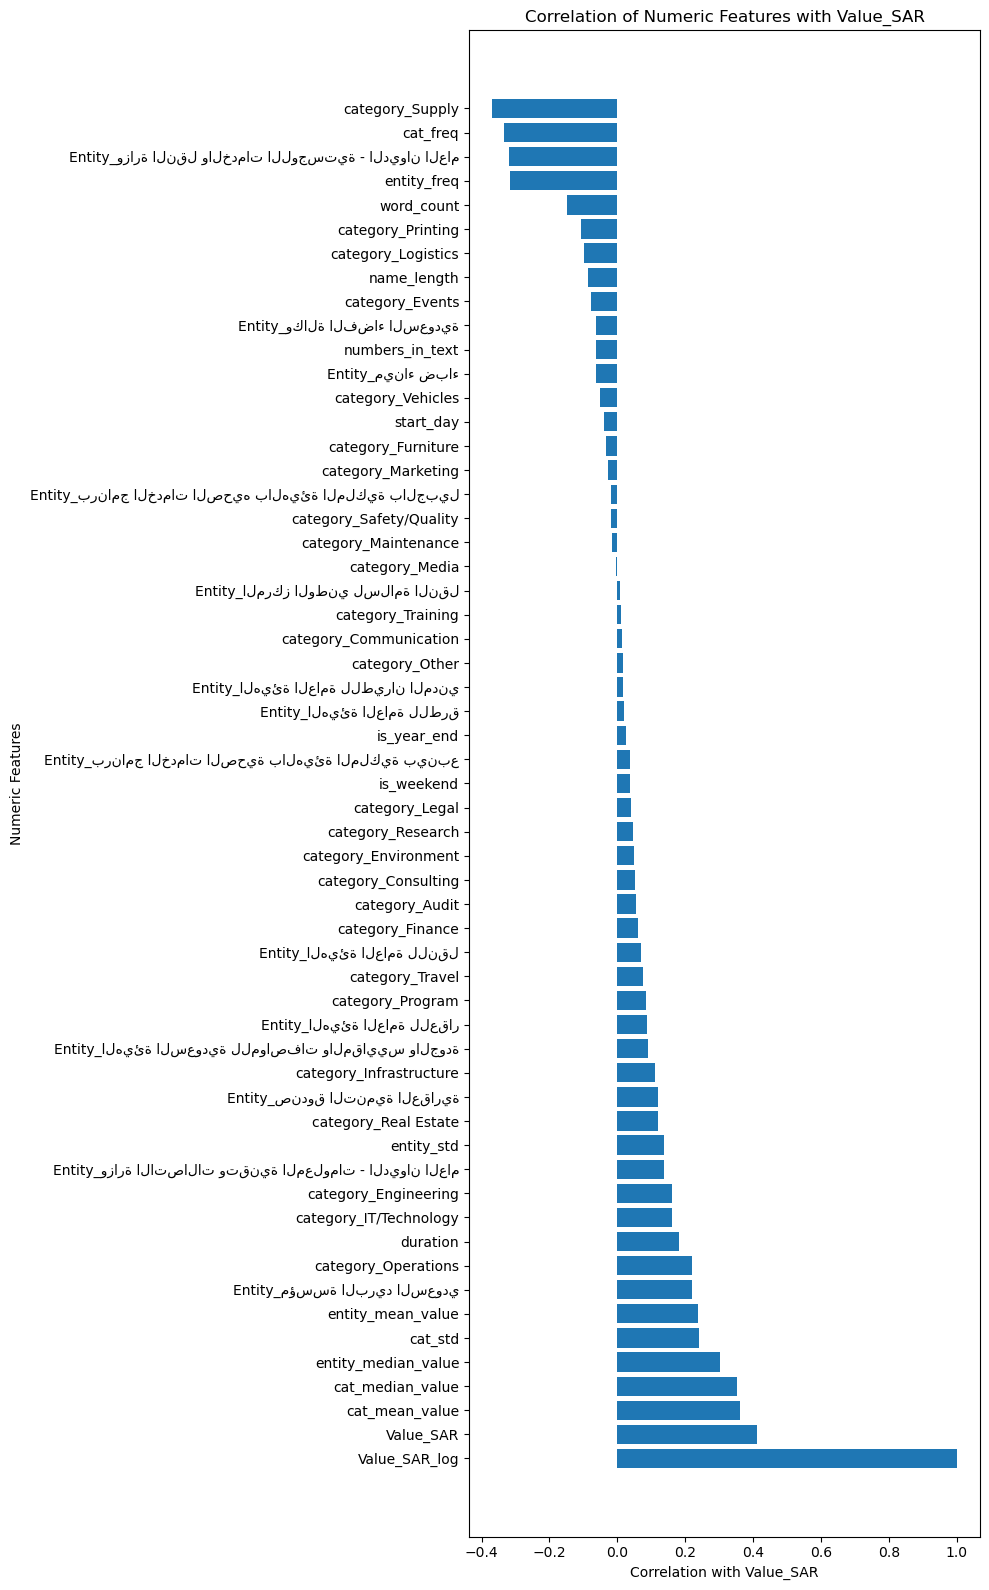

In [1321]:
plt.figure(figsize=(10, 16))
plt.barh(corr_with_target.index, corr_with_target.values)
plt.xlabel("Correlation with Value_SAR")
plt.ylabel("Numeric Features")
plt.title("Correlation of Numeric Features with Value_SAR")
plt.tight_layout()
plt.show()

## Adding more text features and TF-IDF features 
- Adding TF-IDF features helps the model lated on understand the importance of each competition
- Adding keywords which are domain-specific that are features based on categories add more predictive power to the model

In [1323]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

df4["unique_word_count"] = (
    df4["Competition_Name"]
    .astype(str)
    .apply(lambda x: len(set(x.split())))
)

df4["avg_word_length"] = (
    df4["Competition_Name"]
    .astype(str)
    .apply(lambda x: sum(len(w) for w in x.split()) / (len(x.split()) if len(x.split()) > 0 else 1))
)


df4["num_special_chars"] = df4["Competition_Name"].astype(str).apply(
    lambda x: len(re.findall(r"[^a-zA-Z0-9\s]", x))
)

df4["num_uppercase"] = df4["Competition_Name"].astype(str).apply(
    lambda x: sum(1 for c in x if c.isupper())
)

df4["num_lowercase"] = df4["Competition_Name"].astype(str).apply(
    lambda x: sum(1 for c in x if c.islower())
)



keywords = {
    "construction": [
        "إنشاء", "بناء", "طريق", "جسر", "مبنى", "مشروع", "تشييد", "هيكل", "طرق", "جسور"
    ],
    "it": [
        "برمجيات", "نظام", "منصة", "رقمي", "ذكي", "تقني", "تكنولوجيا", "تطبيق", "حاسوب", "برنامج"
    ],
    "consulting": [
        "استشارات", "تقديم_نصيحة", "دراسة", "مراجعة", "تقييم", "إرشاد", "تحليل", "خدمة_استشارية"
    ],
    "training": [
        "تدريب", "برنامج", "ورشة_عمل", "تعليم", "تطوير", "دورة", "مهارات", "تأهيل"
    ],
    "maintenance": [
        "صيانة", "تشغيل", "إصلاح", "تحديث", "إدارة_تشغيلية", "متابعة", "صيانة_دورية"
    ],
    "logistics": [
        "لوجستيات", "نقل", "شحن", "توزيع", "توريد", "إمداد", "مخزن", "مستودع", "تسليم", "سلسلة_إمداد"
    ],
    "health": [
        "صحة", "رعاية_صحية", "مستشفى", "عيادة", "طبيب", "تمريض", "علاج", "تشخيص", "دواء", "صحي"
    ],
    "energy": [
        "طاقة", "كهرباء", "نفط", "غاز", "طاقة_متجددة", "رياح", "شمس", "محطة_طاقة", "وقود"
    ],
    "education": [
        "تعليم", "مدرسة", "جامعة", "معهد", "دراسة", "طالب", "أستاذ", "منهج", "برنامج_تعليمي", "تدريس"
    ],
    "finance": [
        "تمويل", "بنك", "استثمار", "محفظة", "سندات", "أسهم", "أموال", "تأمين", "تحليل_مالي", "ميزانية"
    ],
    "government": [
        "حكومة", "وزارة", "قطاع_عام", "إدارة", "قرار", "سياسة", "جهة_رسمية", "تشريع", "تنظيم", "هيئة"
    ],
    "tourism": [
        "سياحة", "فندق", "رحلة", "جولة", "معلم", "زيارة", "سائح", "منتجع", "رحلات_سياحية", "مواقع_سياحية"
    ],
    "environment": [
        "بيئة", "تلوث", "نفايات", "طبيعة", "حماية_البيئة", "موارد_طبيعية", "تدوير", "تغير_مناخي", "غابات", "مياه"
    ]
}


for key, words in keywords.items():
    df4[f"keyword_{key}"] = df4["Competition_Name"].astype(str).apply(
        lambda text: any(w.lower() in text.lower() for w in words)
    ).astype(int)
    

tfidf = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf.fit_transform(df4["Competition_Name"].astype(str))

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=[f"tfidf_{i}" for i in range(tfidf_matrix.shape[1])]
)

df4 = pd.concat([df4.reset_index(drop=True), tfidf_df], axis=1)
#added some text feautres to expand the dataset and capture some of the predictive power that text holds 

## Adding more numeric features
- Adding interaction terms
- Adding log transformed features
- Adding rations and differences
- Aggregating the keywords
- Adding aggragte TF-IDF features 

In [1325]:
#more numeric features 
df4["duration_x_mean_entity"] = df4["duration"] * df4["entity_mean_value"]
df4["duration_x_cat_mean"] = df4["duration"] * df4["cat_mean_value"]
df4["entity_freq_x_cat_freq"] = df4["entity_freq"] * df4["cat_freq"]
df4["log_duration"] = np.log1p(df4["duration"])
df4["log_entity_mean"] = np.log1p(df4["entity_mean_value"])
df4["log_cat_mean"] = np.log1p(df4["cat_mean_value"])


In [1326]:
# Make a copy to avoid modifying original
df_copy = df4.copy()

# 1. Interaction features between top correlated numeric features
df_copy['cat_mean_x_log_cat'] = df_copy['cat_mean_value'] * df_copy['log_cat_mean']
df_copy['cat_median_x_log_cat'] = df_copy['cat_median_value'] * df_copy['log_cat_mean']
df_copy['keyword_construction_x_duration'] = df_copy['keyword_construction'] * df_copy['duration_x_cat_mean']
df_copy['keyword_finance_x_keyword_government'] = df_copy['keyword_finance'] * df_copy['keyword_government']
df_copy['cat_mean_x_cat_median'] = df_copy['cat_mean_value'] * df_copy['cat_median_value']
df_copy['log_cat_x_duration'] = df_copy['log_cat_mean'] * df_copy['duration_x_cat_mean']
df_copy['cat_mean_x_keyword_construction'] = df_copy['cat_mean_value'] * df_copy['keyword_construction']

# 2. Ratios and differences
df_copy['cat_mean_div_entity_mean'] = df_copy['cat_mean_value'] / (df_copy['entity_mean_value'] + 1e-5)
df_copy['cat_median_minus_cat_mean'] = df_copy['cat_median_value'] - df_copy['cat_mean_value']
df_copy['entity_freq_div_cat_freq'] = df_copy['entity_freq'] / (df_copy['cat_freq'].abs() + 1e-5)
df_copy['duration_per_cat_mean'] = df_copy['duration_x_cat_mean'] / (df_copy['cat_mean_value'] + 1e-5)
df_copy['duration_per_log_cat'] = df_copy['duration_x_cat_mean'] / (df_copy['log_cat_mean'] + 1e-5)

# 3. Squared / log transforms of existing correlated features
df_copy['log_cat_mean_squared'] = df_copy['log_cat_mean'] ** 2
df_copy['keyword_construction_squared'] = df_copy['keyword_construction'] ** 2
df_copy['keyword_finance_squared'] = df_copy['keyword_finance'] ** 2
df_copy['avg_word_length_squared'] = df_copy['avg_word_length'] ** 2
df_copy['log_cat_mean_sqrt'] = np.sqrt(df_copy['log_cat_mean'] + 1e-5)

# 4. Combined TF-IDF features, only useed the ones with high correlation 
tfidf_cols = ['tfidf_9','tfidf_12','tfidf_17','tfidf_30','tfidf_31','tfidf_33','tfidf_41','tfidf_46','tfidf_48','tfidf_49']
df_copy['tfidf_sum_top'] = df_copy[tfidf_cols].sum(axis=1)
df_copy['tfidf_mean_top'] = df_copy[tfidf_cols].mean(axis=1)
df_copy['tfidf_max_top'] = df_copy[tfidf_cols].max(axis=1)

# 5. Keyword density / aggregate features
keyword_cols = ['keyword_construction','keyword_finance','keyword_government','keyword_logistics','keyword_maintenance']
df_copy['keyword_sum'] = df_copy[keyword_cols].sum(axis=1)
df_copy['keyword_avg'] = df_copy[keyword_cols].mean(axis=1)
df_copy['keyword_log_ratio'] = np.log1p(df_copy['keyword_sum']) / (np.log1p(df_copy['word_count']) + 1e-5)

# 6. New combined features
df_copy['cat_mean_x_log_cat_squared'] = df_copy['cat_mean_value'] * (df_copy['log_cat_mean'] ** 2)
df_copy['cat_median_x_log_cat_squared'] = df_copy['cat_median_value'] * (df_copy['log_cat_mean'] ** 2)
df_copy['keyword_construction_x_keyword_finance'] = df_copy['keyword_construction'] * df_copy['keyword_finance']
df_copy['cat_mean_minus_cat_median_squared'] = (df_copy['cat_mean_value'] - df_copy['cat_median_value']) ** 2

## Checking correlation with the target

In [1328]:
# Now check correlations which is basically feature importance 
numeric_cols = [col for col in df_copy.select_dtypes(include=np.number).columns if col != 'Value_SAR']
correlations2 = df_copy[numeric_cols + ['Value_SAR']].corr()['Value_SAR'].sort_values(key=abs, ascending=False)
high_corr_cols = correlations[correlations.abs() >= 0.1].index.drop(["Value_SAR_log"])
print(high_corr_cols) 

Index(['log_cat_mean', 'entity_freq_x_cat_freq', 'Value_SAR',
       'keyword_construction', 'tfidf_48', 'keyword_finance',
       'category_Supply', 'cat_mean_value', 'cat_median_value', 'cat_freq',
       'duration_x_cat_mean',
       'Entity_وزارة النقل والخدمات اللوجستية - الديوان العام', 'entity_freq',
       'keyword_logistics', 'tfidf_41', 'tfidf_46', 'tfidf_30',
       'keyword_maintenance', 'entity_median_value', 'tfidf_12', 'tfidf_33',
       'tfidf_31', 'tfidf_9', 'tfidf_17', 'avg_word_length', 'cat_std',
       'entity_mean_value', 'keyword_government', 'tfidf_49', 'tfidf_16',
       'tfidf_35', 'log_duration', 'tfidf_21', 'duration_x_mean_entity',
       'Entity_مؤسسة البريد السعودي', 'category_Operations', 'tfidf_36',
       'tfidf_34', 'log_entity_mean', 'tfidf_10', 'tfidf_3', 'tfidf_20',
       'duration', 'tfidf_43', 'keyword_it', 'category_IT/Technology',
       'category_Engineering', 'tfidf_27', 'unique_word_count', 'word_count',
       'tfidf_28', 'tfidf_18',
     

## End of EDA 
Now we just export the file to apply machine learning techniques in RapidMiner 

In [1330]:
df5 = df_copy[high_corr_cols].copy()      
df5["Value_SAR"] = df_copy["Value_SAR"]
# had to do this beause it wasnt exporting correctly 

In [1331]:
df5.to_csv("hope.csv", index=False, encoding="utf-8-sig")